# Machine Learning Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance

In [1]:
#import package(s)
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.io as sio 
import random

## 1 Regularized Linear Regression
In the first half of the exercise, regularized linear regression is implemented to predict the amount of water ﬂowing out of a dam using the change of water level in a reservoir. The next half goes through some diagnostics of debugging learning algorithms and examine the eﬀects of bias v.s. variance.

### 1.1 Visualizing the dataset
Visualizing the dataset containing historical records on the change in the water level, $x$, and the amount of water ﬂowing out of the dam, $y$.

This dataset is divided into three parts: 
- A training set that the model will learn on: $X$, $y$ 
- A cross validation set for determining the regularization parameter: $Xval$, $yval$ 
- A test set for evaluating performance. These are “unseen” examples which your model did not see during training: $Xtest$, $ytest$

In the following parts, linear regression is implemented and is used to ﬁt a straight line to the data and learning curves are plotted. Following that, polynomial regression is implemented to ﬁnd a better ﬁt to the data.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    A hypothesis may have a low error for the training examples but may still be inaccurate (because of overﬁtting). Thus, to evaluate a hypothesis, given a dataset of training examples, we can split up the data into two sets: a training set and a test set. 
    
Yet, if a model witha degree $d$ was chosen with the lowest test set error, then the test set error is not a fair estimate of how well the hypothesis generalizes. That is, since the parameters are fitted to the test set, the degree $d$ of polynomial was chosen using the test set. So, the hypothesis is likely to do better on this test set than it would on new examples that it hasn’t seen before.
    
So, now the cross validation set will select the model. Then, the degree of the polynomial $d$ has not been trained using the test set and the test set is used to measure, or to estimate the generalization error of the model that was selected.

</div>

Loading and Visualizing Data ...



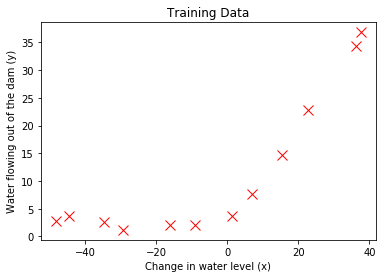

In [2]:
# =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.

#Load Training Data
print('Loading and Visualizing Data ...\n')

#Load from ex5data1: 
#You will have X, y, Xval, yval, Xtest, ytest in your environment
data = sio.loadmat('ex5data1.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

#Number of examples
m = X.shape[0]
mcv = Xval.shape[0]
mtest = Xtest.shape[0]

#Plot training data
plt.figure()
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.title('Training Data')
plt.show()

### 1.2 Regularized linear regression cost function
Recall that regularized linear regression has the following cost function:
 $\begin{align*}J(\theta) = \frac{1}{2m} \left (\sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})^2 \right) + \frac{\lambda}{2m} \left (\sum_{j=1}^n \theta_j^2 \right)\end{align*}$, where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overﬁtting). The regularization term puts a penalty on the overal cost $J$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Do not regularize the intercept term, $\theta_0$.
 
If theta is initialized at $\begin{bmatrix} 1 \\ 
1\end{bmatrix}$, the cost should be $303.993$.

In [3]:
#define function for exercise(s)
def hyp(theta,X):
#    Calculates the hypothesis function
#    X is size m training examples by n features
#    theta is size n features by one
    theta = np.matrix(theta)
    X = np.matrix(X)
    return X*theta.T

def linearRegCostFunction(theta, X, y, learningRate):
#LINEARREGCOSTFUNCTION Compute cost for regularized linear 
#regression with multiple variables
#   J = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
#   cost of using theta as the parameter for linear regression to fit the 
#   data points in X and y. Returns the cost in J.    
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    C = np.average(np.square(y-hyp(theta,X)))/2
    reg = (learningRate*np.sum(np.power(theta[0,1:theta.shape[1]],2)))/(float(2*len(X)))
    return C + reg

# =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 

theta = np.array([1,1])
J = linearRegCostFunction(theta, np.column_stack((np.ones((m,1)), X)), y, 1)
print('Cost at theta = [1 ; 1]: ', J)
print('(this value should be about 303.993192)\n')

Cost at theta = [1 ; 1]:  303.9931922202643
(this value should be about 303.993192)



### 1.3 Regularized linear regression gradient
The partial derivative of regularized linear regression’s cost for $\theta_j$ is deﬁned as
$\begin{align*} \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}, \quad j=0, \end{align*}$
$\begin{align*} \frac{\partial J(\theta)}{\partial \theta_j} = \left (\frac{1}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j, \quad j \geq 1. \end{align*}$
 
If theta is initialized at $\begin{bmatrix} 1 \\ 
1\end{bmatrix}$, the gradient should be $\begin{bmatrix} -15.30 \\ 
598.250\end{bmatrix}$.

In [4]:
#define function for exercise(s)
def linearRegGrad(theta, X, y, learningRate):  
#LINEARREGGRAD Compute gradient for regularized linear 
#regression with multiple variables
#   Grad = LINEARREGGRAD(X, y, theta, lambda) 
#   returns the gradient in grad

    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.shape[1])
    grad = np.zeros(parameters)
    
    #for i = 0
    grad[0] = (np.multiply(hyp(theta,X) - y, X[:,0])).mean()
    
    #for i>0
    for i in range(1,parameters):
        term = np.multiply(hyp(theta,X) - y, X[:,i])
        reg = (learningRate / (float(len(X)))) * theta[0,i]
        grad[i] = term.mean() + reg
        
    return grad

# =========== Part 3: Regularized Linear Regression Gradient =============
#  You should now implement the gradient for regularized linear 
#  regression.
X 
theta = np.array([1,1])
grad = linearRegGrad(theta, np.column_stack((np.ones((m,1)), X)), y, 1)

print('Gradient at theta = [1 ; 1]: ', grad)
print('\n(this value should be about [-15.303016; 598.250744])')

Gradient at theta = [1 ; 1]:  [-15.30301567 598.25074417]

(this value should be about [-15.303016; 598.250744])


### 1.4 Fitting linear regression
The function trainLinearReg will compute the optimal values for $\theta$.

The regularization parameter $\lambda$ is set to zero. Because the current implementation of linear regression is trying to ﬁt a $2$-dimensional $\theta$, regularization will not be incredibly helpful for a $\lambda$ of such low dimension.

The best ﬁt line tells us that the model is not a good ﬁt to the data because the data has a non-linear pattern. While visualizing the best ﬁt as shown is one possible way to debug the learning algorithm, it is not always easy to visualize the data and model. In the next section, a function is implemented to generate learning curves that can help you debug the learning algorithm even if it is not easy to visualize the data.

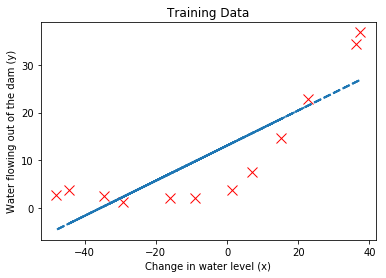

In [5]:
def trainLinearReg(X, y, learningRate):
#TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
#regularization parameter lambda
#   [theta] = TRAINLINEARREG (X, y, lambda) trains linear regression using
#   the dataset (X, y) and regularization parameter lambda. Returns the
#   trained parameters theta.

    X = np.matrix(X)
    #Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    #Minimize using scipy.optimize.minimize
    fmin = sp.minimize(fun=linearRegCostFunction, x0=initial_theta, 
                            args=(X, y, learningRate), method='CG', jac=linearRegGrad, 
                                  options={'maxiter': 200})
    return fmin.x

# =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
 
#  Write Up Note: The data is non-linear, so this will not give a great fit.

#Train linear regression with lambda = 0
Lambda = 0
theta = trainLinearReg(np.column_stack((np.ones((m,1)), X)), y, Lambda)

#Plot fit over the data
plt.figure()
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.plot(X, np.dot(np.column_stack((np.ones((m,1)), X)),theta), '--', linewidth=2.0)
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.title('Training Data')
plt.show()

## 2 Bias-variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underﬁt, while models with high variance overﬁt to the training data.

If a learning algorithm doesn’t do as well, almost all the time it will be either a high bias problem or a high variance problem. We need to distinguish whether bias or variance is the problem contributing to bad predictions.

The illustration below shows the relationship between the degree of the polynomial $d$ and the underﬁtting or overﬁtting of the hypothesis. Image source: Image from Andrew Ng's Machine Learning course on Coursera used for illustration.
![bvar.png](bvar.png)

If $d$ is a very high degree of polynomial, the training error is going to be really low, but the cross-validation error will be very high. If $d$ is a low degree, then both the training error and cross-validation error will be very high. 

This part of the exercise involves plotting the training and test errors on a learning curve to diagnose bias-variance problems.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    These are general behaviors when choosing the degree of the polynomial:
    
  High bias (underﬁtting): both $J_{train} (\theta)$ and $J_{CV} (\theta)$ will be high. Also, $J_{CV} (\theta) \approx J_{train} (\theta).$ 
    
  High variance (overﬁtting): $J_{train} (\theta)$ will be low and $J_{CV} (\theta)$ will be much greater than $J_{train} (\theta)$.

</div>
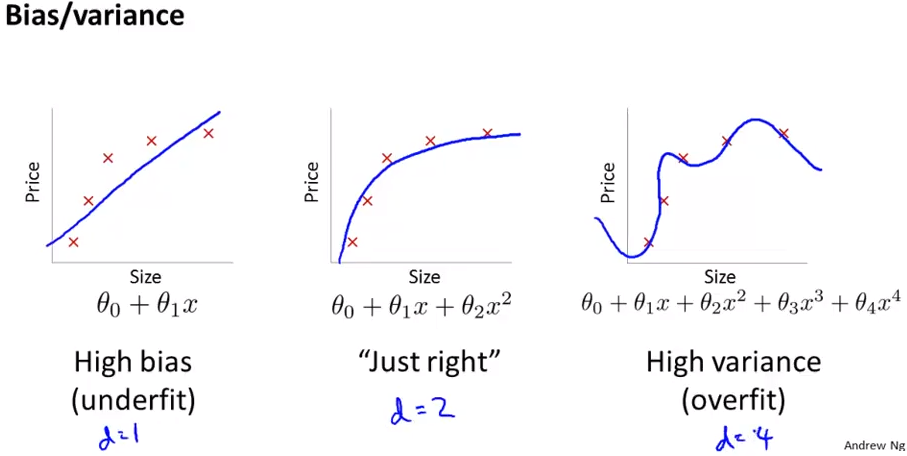

### 2.1 Learning curves
Implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation errors as a function of training set size. The function learningCurve returns a vector of errors for the training set and cross validation set. This will show how these errors behave over smaller subsets of the training data. 

A learning curve plots a training and cross validation set error for diﬀerent training set sizes. To obtain diﬀerent training set sizes, use diﬀerent subsets of the original training set $X$. Speciﬁcally, for a training set size of $i$, use the ﬁrst $i$ examples (i.e., $X(1:i,:)$ and $y(1:i)$).

After learning the $\theta$ parameters, compute the error on the training and cross validation sets. Recall that the training error for a dataset is deﬁned as $\begin{align*}J_{train}(\theta) = \frac{1}{2m} \sum_{i=1}^m \left ( h_{\theta} (x^{(i)}) - y^{(i)} \right) ^2  \end{align*}$ and the cross-validation error is $\begin{align*}J_{cv}(\theta) = \frac{1}{2m_{cv}}  \sum_{i=1}^{m_{cv}} \left (h_{\theta} (x_{cv}^{(i)}) - y_{cv}^{(i)} \right)^2 \end{align*}$. 

In particular, note that the training error does not include the regularization term. One way to compute the training error is to use the existing cost function and set $\lambda$ to $0$ only when using it to compute the training error and cross validation error. When computing the training set error, make sure to compute it on the training subset (i.e., $X(1:n,:)$ and $y(1:n)$) instead of the entire training set. However, the cross validation error should be computed over the entire cross validation set.

As the training set size increases, the cross validation error and test set error will tend to decrease. If the learning algorithm has high bias, then getting a lot more training data doesn’t actually help to get a much lower cross validation error or test set error. Yet if the learning algorithm has high variance, then getting a lot more training data might help to get the training error to keep going up and the cross validation error to keep going down.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    These are general behaviors when choosing the size of the training set size:
    
  Experiencing high bias (underﬁtting): 
  
  - Low training set size: $J_{train} (\theta)$ to be low and $J_{CV} (\theta)$ to be high
  
  - Large training set size: both $J_{train} (\theta)$ and $J_{CV} (\theta)$ to be high with $J_{CV} (\theta) \approx J_{train} (\theta).$ 
  
  Experiencing high variance (overﬁtting): $J_{train} (\theta)$ will be low and $J_{CV} (\theta)$ will be much greater than $J_{train} (\theta)$.

  - Low training set size: $J_{train} (\theta)$ to be low and $J_{CV} (\theta)$ to be high
  
  - Large training set size: $J_{train} (\theta)$ increases with training set size and $J_{CV} (\theta)$  continues to decrease without leveling oﬀ. Also, $J_{train} (\theta) < J_{CV} (\theta)$, but there is a significant gap between them. 
</div>

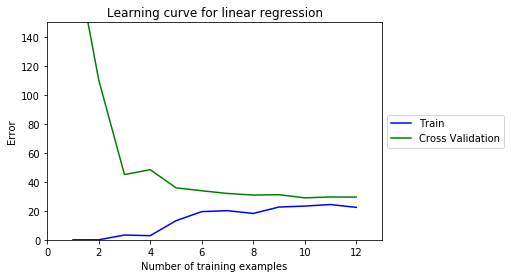

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	205.121096

  	2		0.000000	110.300366

  	3		3.286595	45.010232

  	4		2.842678	48.368911

  	5		13.154049	35.865141

  	6		19.443963	33.829957

  	7		20.098522	31.970987

  	8		18.172859	30.862446

  	9		22.609405	31.135998

  	10		23.261462	28.936207

  	11		24.317250	29.551432

  	12		22.373906	29.433818



In [6]:
#define function for exercise(s)
def learningCurve(Xtrain, ytrain, Xval, yval, learningRate):
#LEARNINGCURVE Generates the train and cross validation set errors needed 
#to plot a learning curve
#  [error_train, error_val] = ...
#       LEARNINGCURVE(X, y, Xval, yval, lambda) returns the train and
#       cross validation set errors for a learning curve. In particular, 
#       it returns two vectors of the same length - error_train and 
#       error_val. Then, error_train(i) contains the training error for
#       i examples (and similarly for error_val(i)).
#   In this function, you will compute the train and test errors for
#   dataset sizes from 1 up to m. In practice, when working with larger
#   datasets, you might want to do this in larger intervals.
    
    #Number of training examples
    m = Xtrain.shape[0]

    #You need to return these values correctly
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(m):
        #train theta over the first i examples (i.e., X(1:i,:) and y(1:i))
        theta = trainLinearReg(Xtrain[0:i+1,:], ytrain[0:i+1,:], learningRate)
        #evaluate the training error on the first i training examples 
        #(i.e., X(1:i, :) and y(1:i)).
        error_train[i] = linearRegCostFunction(theta, Xtrain[0:i+1,:], 
                   ytrain[0:i+1,:], learningRate)
        #for the cross-validation error, you should instead evaluate on the 
        #entire cross validation set (Xval and yval)
        error_val[i] = linearRegCostFunction(theta, Xval, yval, learningRate)
        
    return error_train, error_val

# =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- Figure 3 in ex5.pdf 

Lambda = 0
err_train, err_val = learningCurve(np.column_stack((np.ones((m,1)), X)), y, 
                                   np.column_stack((np.ones((mcv,1)), Xval)), yval, Lambda)

plt.figure()
plt.plot(range(1,m+1), err_train, 'b-', label = 'Train')
plt.plot(range(1,m+1), err_val, 'g-', label = 'Cross Validation')
plt.ylabel('Error')
plt.xlabel('Number of training examples')
plt.title('Learning curve for linear regression')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.axis([0, 13, 0, 150])
plt.show()

print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t%d\t\t%f\t%f\n' % (i+1, err_train[i], err_val[i]))

In the figure, observe that both the train error and cross validation error are high when the number of training examples is increased. This reﬂects a high bias problem in the model – the linear regression model is too simple and is unable to ﬁt the dataset well. In the next section, polynomial regression is implemented to ﬁt a better model for this dataset.

## 3 Polynomial regression
The problem with the linear model was that it was too simple for the data and resulted in underﬁtting (high bias). In this part of the exercise, this problem is addressed by adding more features. For polynomial regression, the hypothesis has the form:
$\begin{align*} h_{\theta} (x) = \theta_0 + \theta_1 \ast (\text{waterLevel}) + \theta_2 \ast (\text{waterLevel})^2 + \cdots + \theta_p \ast (\text{waterLevel})^p  = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p. \end{align*}$

By defining $x_1 = (\text{waterLevel}), x_2 = (\text{waterLevel})^2 , \dots, x_p = (\text{waterLevel})^p$, the features of the linear model are the various powers of the original value (waterLevel).

Add more features using the higher powers of the existing feature $x$ in the dataset. The function polyFeatures maps the original training set $X$ of size $m \times 1$ into its higher powers. Speciﬁcally, when a training set $X$ of size $m \times 1$ is passed into the function, the function should return a $m \times p$ matrix $X_{poly}$, where column $1$ holds the original values of $X$, column $2$ holds the values of $X^2$, column $3$ holds the values of $X^3$, and so on. No need to account for the zero-eth power in this function. Apply it to the training set, the test set, and the cross validation set.

### 3.1 Learning Polynomial Regression
Even though there are polynomial terms in the feature vector, we are still solving linear regression optimization problem. The polynomial terms have simply turned into features for linear regression.

This part of the exercise uses a polynomial of degree $8$. Feature normalization is needed because the features are badly scaled if trained directly (e.g., an example with $x = 40$ will now have a feature $x_8 = 40^8 = 6.5 \times 10^{12}$).

After learning the parameters $\theta$ when $\lambda=0$, a plot shows that the polynomial ﬁt is able to follow the datapoints very well - thus, obtaining a low training error. However, the polynomial ﬁt is very complex and even drops oﬀ at the extremes. This is an indicator that the polynomial regression model is overﬁtting the training data and will not generalize well. 

To better understand the problems with the unregularized model, a plot of the learning curve shows the same eﬀect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem.

In [7]:
#define function for exercise(s)
def polyFeatures(X, p):
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

    X_poly = np.zeros((X.shape[0], p))
    X_poly = np.matrix(X_poly)
    for i in range(p):
        X_poly[:,i] = np.power(X,i+1)
    return X_poly

def featureNormalize(X):
#POLYFEATURES Maps X (1D vector) into the p-th power
#   [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
#   maps each example into its polynomial features where
#   X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];

    #compute the mean of each column
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    #compute the standard deviation of each column
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

# =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers

p = 8

#Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly) # Normalize
X_poly = np.column_stack((np.ones((m,1)), X_poly)) # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu)/sigma
X_poly_test = np.column_stack((np.ones((mtest,1)), X_poly_test)) # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu)/sigma
X_poly_val = np.column_stack((np.ones((mcv,1)), X_poly_val))  # Add Ones

print('Normalized Training Example 1:\n')
print(X_poly[0, :])

Normalized Training Example 1:

[[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
  -0.6171516   0.35983501 -0.53109126]]


One way to combat the overﬁtting (high-variance) problem is to add regularization to the model. In the next section, diﬀerent $\lambda$ parameters are tried to see how regularization can lead to a better model.


### 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter
This section observes how the regularization parameter aﬀects the bias-variance of regularized polynomial regression. Modify the the lambda parameter to values like $\lambda = 1, 100$. 

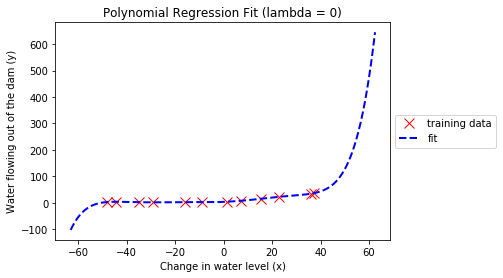

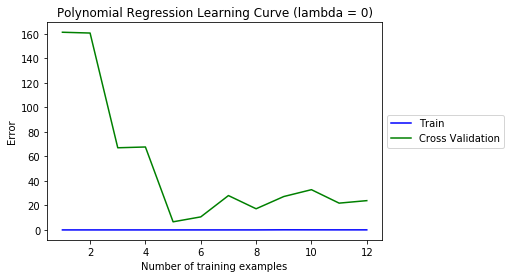

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	161.442168

  	2		0.000000	160.792292

  	3		0.000000	67.084922

  	4		0.000000	67.726849

  	5		0.000000	6.616987

  	6		0.000000	10.643062

  	7		0.000000	28.049131

  	8		0.002110	17.270760

  	9		0.077438	27.269912

  	10		0.053087	32.859298

  	11		0.038671	21.873716

  	12		0.042423	23.911126



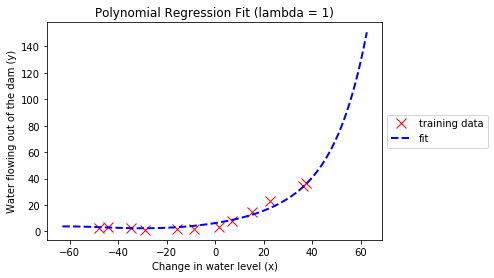

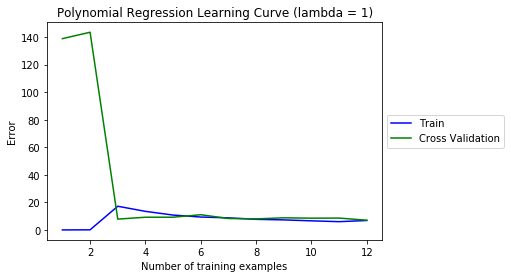

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846777

  	2		0.070327	143.505309

  	3		17.182727	7.844936

  	4		13.476899	9.212260

  	5		10.781524	9.222845

  	6		9.347014	11.024650

  	7		8.754387	8.290422

  	8		7.682189	8.001028

  	9		7.277291	8.793924

  	10		6.592031	8.528178

  	11		5.994056	8.585945

  	12		6.830463	7.047226



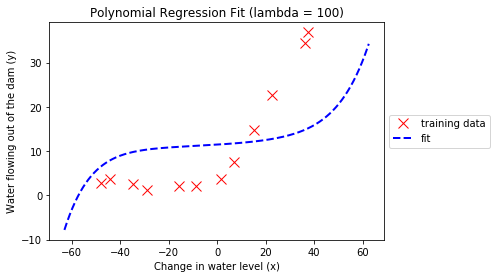

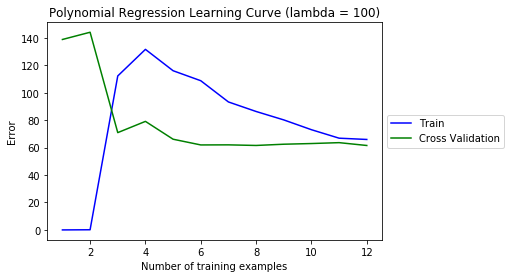

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846782

  	2		0.114717	144.124099

  	3		112.255156	70.935850

  	4		131.638608	79.137854

  	5		116.062526	66.126942

  	6		108.778507	61.957754

  	7		93.297101	62.018722

  	8		86.349367	61.581277

  	9		80.206754	62.481423

  	10		73.060272	62.979549

  	11		66.883255	63.626912

  	12		65.950955	61.559270



In [8]:
#define function for exercise(s)
def plotFit(min_x, max_x, mu, sigma, theta, p):
#PLOTFIT Plots a learned polynomial regression fit over an existing figure.
#Also works with linear regression.
#   PLOTFIT(min_x, max_x, mu, sigma, theta, p) plots the learned polynomial
#   fit with power p and feature normalization (mu, sigma).
    
    #We plot a range slightly bigger than the min and max values to get
    #an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05)
    #reshape to 2d array
    x = np.reshape(x, (-1, 1))
    
    #Map the X values 
    X_poly = polyFeatures(x, p)
    X_poly = (X_poly - mu)/sigma

    #Add ones
    X_poly = np.column_stack((np.ones((X_poly.shape[0],1)), X_poly))

    #Plot
    plt.plot(x, np.dot(X_poly, theta).T, 'b--', linewidth=2.0, label='fit')

# =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of lambda. The code below runs polynomial regression with 
#  lambda = 0. You should try running the code with different values of
#  lambda to see how the fit and learning curve change.

Lambda = np.array([[0, 1, 100]])

for i in range(Lambda.shape[1]):
    theta = trainLinearReg(X_poly, y, Lambda[0,i])

    plt.figure()
    plt.plot(X, y, 'rx', markersize=10, linewidth=1.5, label='training data')
    plotFit(min(X), max(X), mu, sigma, theta, p)
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.title('Polynomial Regression Fit (lambda = %s)' % Lambda[0,i])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.show()
    
    err_train, err_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda[0,i])
    
    plt.figure()
    plt.plot(range(1,m+1), err_train, 'b-', label = 'Train')
    plt.plot(range(1,m+1), err_val, 'g-', label = 'Cross Validation')
    plt.ylabel('Error')
    plt.xlabel('Number of training examples')
    plt.title('Polynomial Regression Learning Curve (lambda = %s)' % Lambda[0,i])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.show()
    
    print('# Training Examples\tTrain Error\tCross Validation Error\n')
    for i in range(m):
        print('  \t%d\t\t%f\t%f\n' % (i+1, err_train[i], err_val[i]))

For $\lambda = 1$, a plot shows a polynomial ﬁt that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows the $\lambda = 1$ regularized polynomial regression model does not have the high bias or high-variance problems. In eﬀect, it achieves a good trade-oﬀ between bias and variance. 

For $\lambda = 100$, a plot shows a polynomial ﬁt that does not follow the data well. In this case, there is too much regularization and the model is unable to ﬁt the training data.

### 3.3 Selecting $\lambda$ using a cross validation set
The value of $\lambda$ can signiﬁcantly aﬀect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda=0$) ﬁts the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda=100$) does not ﬁt the training set and testing set well. A good choice of $\lambda$ (e.g., $\lambda=1$) can provide a good ﬁt to the data.

This section implements an automated method to select the $\lambda$ parameter from a set of values. A cross validation set is used to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, the model is evaluated on the test set to estimate how well the model will perform on actual unseen data.

<div class="alert alert-block alert-info">
<b>Note:</b>  
    Steps to choose the model and the regularization term $\lambda$:
    
   1. Create a set of values for lambda.
    
   2. Create a set of models with diﬀerent degrees or any other variants.
    
   3. Iterate through the  $\lambda$s and for each  $\lambda$ go through all the models to learn some $\Theta$.
    
   4. Compute the cross validation error using the learned $\Theta$ (computed with $\lambda$) on the $J_{CV} (\Theta)$ without regularization or  $\lambda = 0.$ 
    
   5. Select the best combo that produces the lowest error on the cross validation set. 
    
   6. Using the best combo $\Theta$ and $\lambda$, apply it on $J_{test} (\Theta)$ to see if it has a good generalization of the problem.
</div>

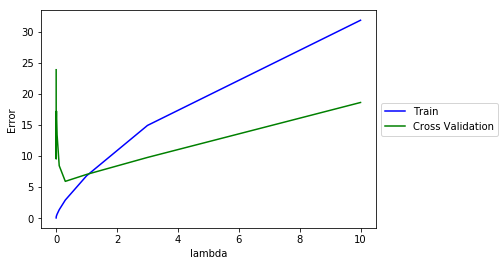

	lambda			Train Error	Validation Error

  	0.000000		0.042423	23.911126

  	0.001000		0.169513	9.529518

  	0.003000		0.243172	16.014623

  	0.010000		0.371283	17.240727

  	0.030000		0.636703	13.423179

  	0.100000		1.360572	8.453659

  	0.300000		2.917649	5.931970

  	1.000000		6.830463	7.047226

  	3.000000		14.937646	9.782200

  	10.000000		31.878154	18.633922



In [9]:
def validationCurve(X, y, Xval, yval):
#VALIDATIONCURVE Generate the train and validation errors needed to
#plot a validation curve that we can use to select lambda
#   [lambda_vec, error_train, error_val] = ...
#       VALIDATIONCURVE(X, y, Xval, yval) returns the train
#       and validation errors (in error_train, error_val)
#       for different values of lambda. You are given the training set (X,
#       y) and validation set (Xval, yval).
    
    #Selected values of lambda (you should not change this)
    lambda_vec = np.array([[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]])
    
    #Number of training examples
    m = lambda_vec.shape[1]

    #You need to return these values correctly
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(m):
        #train theta
        theta = trainLinearReg(X, y, lambda_vec[0,i])
        #evaluate the training error 
        error_train[i] = linearRegCostFunction(theta, X, y, lambda_vec[0,i])
        #for the cross-validation error, you should instead evaluate on the 
        #entire cross validation set (Xval and yval)
        error_val[i] = linearRegCostFunction(theta, Xval, yval, lambda_vec[0,i])
        
    return lambda_vec, error_train, error_val

# =========== Part 8: Validation for Selecting Lambda =============
#  You will now implement validationCurve to test various values of 
#  lambda on a validation set. You will then use this to select the
#  "best" lambda value.

lambda_vec, err_train, err_val = validationCurve(X_poly, y, X_poly_val, yval)
    
plt.figure()
plt.plot(lambda_vec.T, err_train, 'b-', label = 'Train')
plt.plot(lambda_vec.T, err_val, 'g-', label = 'Cross Validation')
plt.ylabel('Error')
plt.xlabel('lambda')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

print('\tlambda\t\t\tTrain Error\tValidation Error\n')
for i in range(lambda_vec.shape[1]):
    print('  \t%f\t\t%f\t%f\n' % (lambda_vec[0,i], err_train[i], err_val[i]))

A cross validation curve of error is plotted against $\lambda$ values shows which $\lambda$ parameter to use. The best value of $\lambda$ is around $3$. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

### 3.4 Optional (ungraded) exercise: Computing test set error
In the previous part of the exercise, the cross validation error was computed for various values of the regularization parameter $\lambda$. However, to get a better indication of the model’s performance in the real world, it is important to evaluate the "final" model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters $\theta$).

For cross validation, the test error should be $3.8599$ for the best lambda found, $\lambda = 3.$

<div class="alert alert-block alert-info">
<b>Note:</b> 
    The following method is used to calculate three separate error values for the three diﬀerent sets when faced with a model selection problem:
    
1. Optimize the parameters in $\Theta$ using the training set for each polynomial degree.
2. Find the polynomial degree $d$ with the least error using the cross validation set.
3. Estimate the generalization error using the test set with $J_{test}(\Theta^d)$, ($d$ = theta from polynomial with lower error).

</div>

In [10]:
#value of lambda from lambda_vec that gave the lowest cv error  
best_lambda = lambda_vec[0,err_val.argmin()] 
theta_test = trainLinearReg(X_poly, y, best_lambda)
test_err = linearRegCostFunction(theta_test, X_poly_test, ytest, best_lambda)
print('The test set error when lambda = %s is %f' % (best_lambda,test_err))

The test set error when lambda = 0.3 is 6.492383


My results differ from the one in the exercise manual, but I did chose the $\lambda$ that gave the lowest cross validation error.

### 3.5 Optional (ungraded) exercise: Plotting learning curves with randomly selected examples
In practice, especially for small training sets, when learning curves are ploted to debug the algorithms, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross validation error.

Concretely, to determine the training error and cross validation error for $i$ examples, ﬁrst randomly select $i$ examples from the training set and $i$  examples from the cross validation set. Then learn the parameters $\theta$ using the randomly chosen training set and evaluate the parameters $\theta$ on the randomly chosen training set and cross validation set. The above steps should then be repeated multiple times (say $50$) and the averaged error should be used to determine the training error and cross validation error for $i$ examples

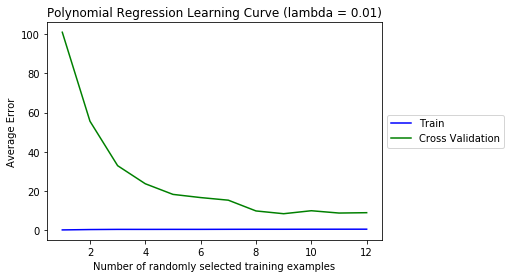

In [12]:
#define function for exercise(s)
def randomSelect(Xtrain, ytrain, Xval, yval, learningRate, num_iter):
#RANDOMSELECT randomly select examples for the training and cross 
#validation set to plot learning curves

    # Number of training examples
    m = Xtrain.shape[0]
    
    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(1,m+1):
        # introduce arrays to store values at each iteration
        train = np.zeros(num_iter)
        val = np.zeros(num_iter)
        
        for n in range(num_iter):
            #pick an random sample of i examples
            r_train = random.sample(set(range(m)), i)
            r_cv = random.sample(set(range(m)), i)
            #train theta over the r examples 
            theta = trainLinearReg(Xtrain[r_train,:], ytrain[r_train,:], learningRate)
            #evaluate the training error on the r examples
            train[n] = linearRegCostFunction(theta, Xtrain[r_train,:], 
                       ytrain[r_train,:], learningRate)
            #for the cross-validation error, you should instead evaluate on the 
            #entire cross validation set (Xval and yval)
            val[n] = linearRegCostFunction(theta, Xval[r_cv,:], yval[r_cv,:], learningRate)
        
        #find the average error for i examples 
        error_train[i-1] = train.mean()
        error_val[i-1] = val.mean()
        
    return error_train, error_val

rs_lambda = 0.01
rs_errtrain, rs_errval = randomSelect(X_poly, y, X_poly_val, yval, rs_lambda, 50)

plt.plot(range(1,m+1), rs_errtrain, 'b-', label = 'Train')
plt.plot(range(1,m+1), rs_errval, 'g-', label = 'Cross Validation')
plt.ylabel('Average Error')
plt.xlabel('Number of randomly selected training examples')
plt.title('Polynomial Regression Learning Curve (lambda = %s)' % rs_lambda)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()